In [1]:
%matplotlib inline
import torch
import random
from d2l import torch as d2l

In [2]:
def synthetic_data(w, b, num_examples):
    """
    生成y=Xw+b+噪声
    X指特征值，Y指噪声值
    """
    X = torch.normal(0,1,(num_examples,len(w)))
    Y = torch.matmul(X,w)+b
    Y += torch.normal(0,0.1,Y.shape)
    return X,Y.reshape(-1,1)
true_w = torch.tensor([2,-3.4])
true_b = 4.2
features, labels = synthetic_data(true_w,true_b,1000)

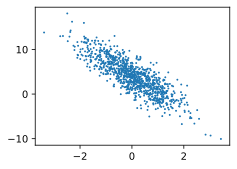

In [3]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1);

In [4]:
def data_iter(batch_size, features, labels):
    '''
    接收批量大小、特征矩阵和标签向量作为输入，生成大小为batch_size的小批量。 
    每个小批量包含一组特征和标签。
    '''
    num_examples = len(features)
    indices = list(range(num_examples))
    # 这些样本是随机读取的，没有特定的顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [5]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.0640,  0.6136],
        [ 0.8285, -0.7969],
        [ 0.4732,  0.8548],
        [-0.0257, -0.0912],
        [-1.1067, -0.6956],
        [-0.7703,  0.2243],
        [-1.0136, -0.1843],
        [ 0.9876, -0.9615],
        [ 0.1261, -2.1022],
        [-0.2191, -1.0211]]) 
 tensor([[ 4.1687],
        [ 8.6287],
        [ 2.2877],
        [ 4.4515],
        [ 4.3520],
        [ 1.8935],
        [ 2.6958],
        [ 9.4111],
        [11.6614],
        [ 7.0172]])


In [6]:
# 初始化参数
w = torch.tensor([12.0,0],requires_grad=True)
b = torch.zeros(1,requires_grad=True)

In [7]:
def linreg(X,w,b):
    '''线性回归模型'''
    return torch.matmul(X,w) + b

In [8]:
# 损失函数
def squared_loss(y_hat,y):
    return (y_hat-y.reshape(y_hat.shape))**2 / 2

In [9]:
# 优化算法
def sgd(params,lr,batch_size):
    '''小批量随机梯度下降'''
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()
        

In [10]:
lr = 0.05
num_epochs = 5
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for x,y in data_iter(batch_size, features, labels):
        l = loss(net(x,w,b),y)
        l.sum().backward()
        sgd([w,b],lr,batch_size)
    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.006193
epoch 2, loss 0.005058
epoch 3, loss 0.005068
epoch 4, loss 0.005105
epoch 5, loss 0.005050
